<a href="https://colab.research.google.com/github/a-forty-two/COG_GN22CDBDS001_MARCH_22/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
datapath = 'https://raw.githubusercontent.com/a-forty-two/DFE5/main/breastcancer_data.csv'
data = pd.read_csv(datapath, header=0)
df = data.iloc[:, [1,2,3,4,5]] # 1-> diag (Y), 2,3,4-> inputs (X)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
0,M,17.99,10.38,122.80,1001.0
1,M,20.57,17.77,132.90,1326.0
2,M,19.69,21.25,130.00,1203.0
3,M,11.42,20.38,77.58,386.1
4,M,20.29,14.34,135.10,1297.0


In [ ]:
y = df.pop('diagnosis') # REMOVE the feature from df and put into y 
x = df
# y = f(x) -> equation for DTree 
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Decision Tree, Random Forest -> work on relative comparison -> NORMALIZING or NOT normalizing
# may not cause any diff at all 
from sklearn.tree import DecisionTreeClassifier
# Hyperparameter-> max_depth
# parameters-> ytrain, xtrain 
dtree = DecisionTreeClassifier(max_depth=5)
dtree_light =  DecisionTreeClassifier(max_depth=3)
dtree_deep =  DecisionTreeClassifier(max_depth=10)
dtree.fit(xtrain, ytrain)
dtree_light.fit(xtrain, ytrain)
dtree_deep.fit(xtrain, ytrain)
# WEIGHTS and BIASES, y = Weights * inputs + bias -> MACHINE LEARNING
# Decision TREE doesn't help with calculating the above! 
# it helps finding thresholds within which features take decisions 


DecisionTreeClassifier(max_depth=10)

In [ ]:
pred1 = dtree.predict(xtest)
pred2 = dtree_light.predict(xtest)
pred3 = dtree_deep.predict(xtest)
from sklearn.metrics import accuracy_score
# COMPARING the TREES to each other, not to the actual answer (ytest)
score = accuracy_score(pred1, pred2)
print(score)
score = accuracy_score(pred1, pred3)
print(score)
score = accuracy_score(pred3, pred2)
print(score)

0.9517543859649122
0.9429824561403509
0.9035087719298246


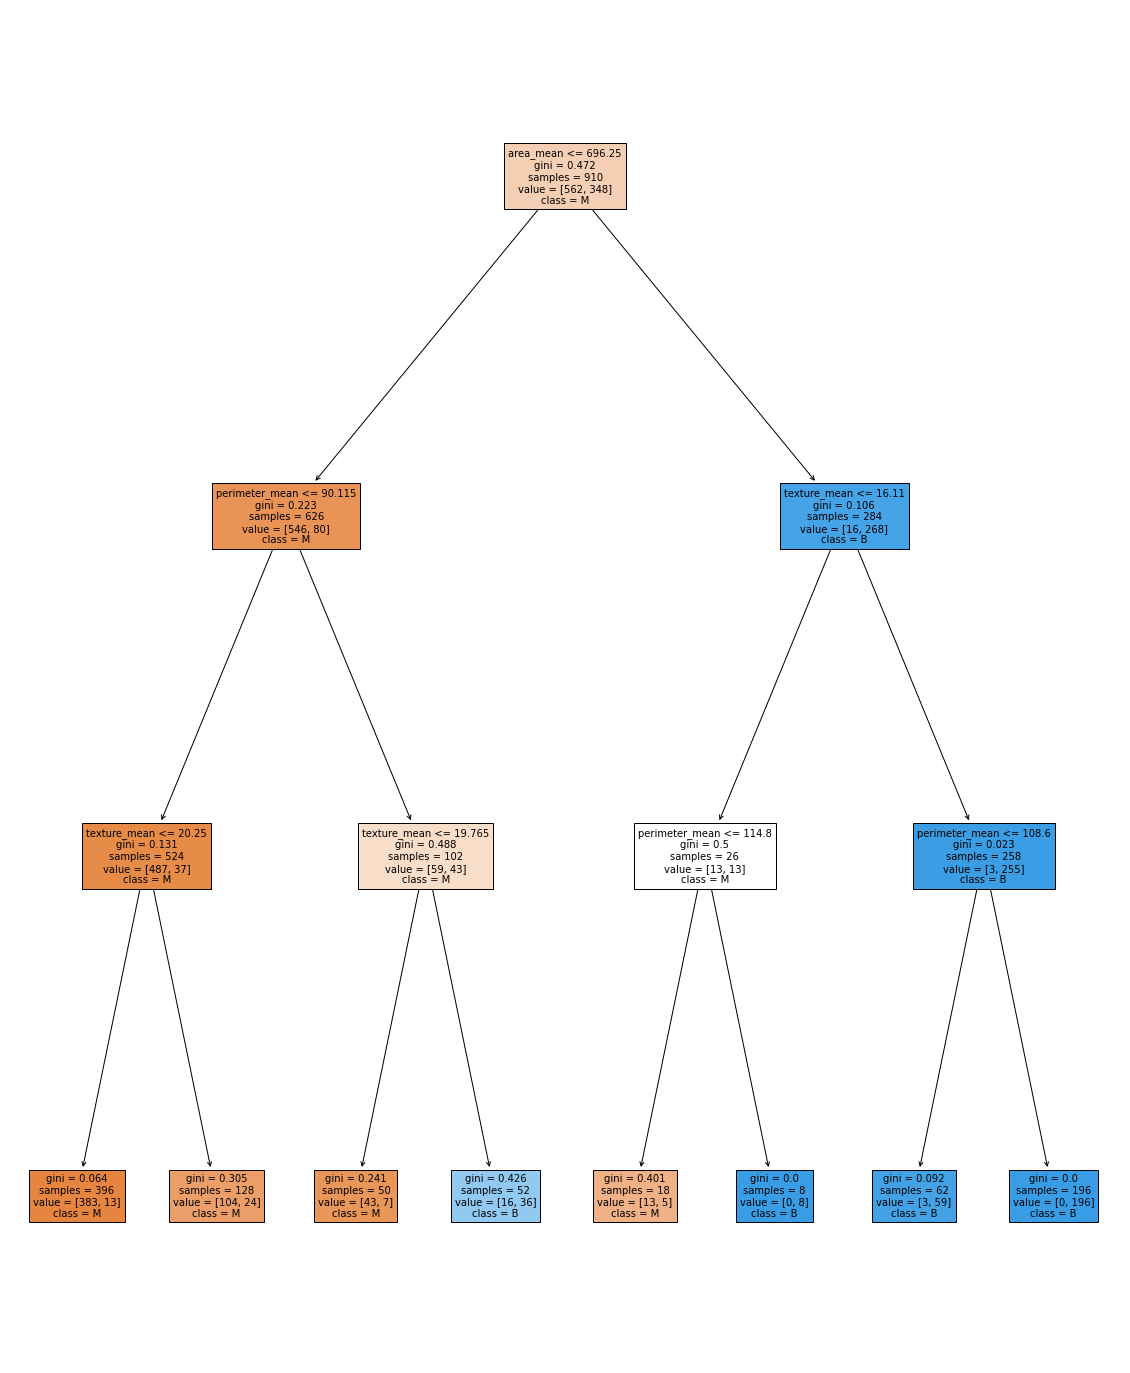

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,25))
a = plot_tree(dtree_light, feature_names=x.columns, fontsize=10, filled=True, class_names=['M','B'])
plt.show()
